In [665]:
print("Analyse Bourse")


Analyse Bourse


# Let's go learning PYTHON !

In [666]:
# Ceci est un commentaire dans la cellule de code 
# Python est de la programmation OBJET. On définit des variables. 
name = "Corentin"

print(name)


Corentin


In [667]:
name
# si on appelle la variable alors on voit son type.

'Corentin'

In [668]:
# Pour les chiffres on a 
# LES ENTIERS NATURELS
age = 24
print(age)

24


In [669]:
# Pour les chiffres à virgule on parle de FLOATS
pi = 3.14159
pi

3.14159

In [670]:
name = 'Imen'
#Titouan c'est du texte == STRING

In [671]:
# Mais nous sommes humains, donc nous LISONS des PHRASES
# Dès lors, on utilise la fonction PRINT F, qui permet d'avoir un print plus proche de notre language
# Les variables y sont DYNAMIQUES

print(f'Hello, les boloss dont {name}')

Hello, les boloss dont Imen


In [672]:
is_cool = True
is_cool

True

# Présentation des DATA STRUCTURES


In [673]:
# Les LISTES se nomment list en anglais 
stocks = ["AAPL","GOOGL","MSFT","TSLA"]
stocks


['AAPL', 'GOOGL', 'MSFT', 'TSLA']

In [674]:
# On peut AJOUTER des inputs dans la liste via la fonction APPEND
stocks.append("AMZN")
stocks

['AAPL', 'GOOGL', 'MSFT', 'TSLA', 'AMZN']

In [675]:
# UN DICTIONNAIRE c'est mieux encore qu'une liste
# On parle de Clé-Valeur
prices = {
    "APPL":248.04,
    "GOOGLE":328.33,
    "TSLA":437.43
}
prices

{'APPL': 248.04, 'GOOGLE': 328.33, 'TSLA': 437.43}

# La clé du succès

In [676]:
# C'est le fait que python repose sur des PACKAGES
# Donc on gagne un temps fou à ne pas ré inventer la ROUE à chaque fois
#! pip install yfinance

In [677]:
! pip install yfinance


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [678]:
import yfinance as yf

In [679]:
! pip install matplotlib


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [680]:
# La structure d'un projet python 
# Une structure où on emporte tous les packages
# Comme ça on a une overview des dépendances 

In [681]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [682]:
ticker = "AAPL"

In [683]:
# Pour prendre les données du packages yfinance on utilise
# Une FONCTION qui est def dans ce package pour EXTRAIRE la donnée
data = yf.download(ticker, start="2020-01-01",progress=False)

/usr/local/python/3.12.1/lib/python3.12/site-packages/yfinance/scrapers/history.py:144: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  end_dt = pd.Timestamp.utcnow().tz_convert(tz)
/usr/local/python/3.12.1/lib/python3.12/site-packages/yfinance/scrapers/history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()


In [684]:
data

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.400528,72.460791,71.156689,71.409793,135480400
2020-01-03,71.696625,72.455943,71.472447,71.629130,146322800
2020-01-06,72.267944,72.306514,70.568518,70.819216,118387200
2020-01-07,71.928047,72.533087,71.708687,72.277571,108872000
2020-01-08,73.085106,73.386423,71.631552,71.631552,132079200
...,...,...,...,...,...
2026-02-09,274.619995,278.200012,271.700012,277.910004,44623400
2026-02-10,273.679993,275.369995,272.940002,274.890015,34376900


In [685]:
data.head() # fonction pour voir les 5 premières lignes du dataset
data.tail() # fonction pour voir les 5 dernières lignes du dataset

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2026-02-09,274.619995,278.200012,271.700012,277.910004,44623400
2026-02-10,273.679993,275.369995,272.940002,274.890015,34376900
2026-02-11,275.500000,280.179993,274.450012,274.700012,51931300
2026-02-12,261.730011,275.720001,260.179993,275.589996,80867900
2026-02-13,258.720001,262.230011,258.369995,262.010010,26171335


In [686]:
#packages intéressant : yfinance; pypfopt ; empyrical ; risk-kit

In [687]:
print(data.columns)

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [688]:
#1. Télécharger les données (depuis 2020)
ticker = "AAPL"
data = yf.download(ticker, start="2020-01-01", auto_adjust=False)

#2 Calculer les rendements journaliers (Daily returns)
# On utilise le "Adj Close" (prix ajusté aux dividendes/splits)
data ['Returns']= data['Adj Close'].pct_change()

#3. Calculer la volatilité et le rendement moyen (Annualisés)
# Il y a neviron 252 jours de trading par an 
mean_return_daily = data['Returns'].mean()
volatility_daily = data ['Returns'].std()
annualized_return = mean_return_daily * 252
annualized_volatility = volatility_daily*np.sqrt(252)

#4. Calcul du ratio de Sharpe (supposons un taux sans risque de 0)
sharpe_ratio = annualized_return / annualized_volatility

print(f"---Analyse pour {ticker}---")
print(f"Rendement annualisé: {annualized_return:.2%}")
print(f"volatilité annualisée: {annualized_volatility:.2%}")
print(f"Ratio de Sharpe:{sharpe_ratio:2f}")

/usr/local/python/3.12.1/lib/python3.12/site-packages/yfinance/scrapers/history.py:144: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  end_dt = pd.Timestamp.utcnow().tz_convert(tz)
/usr/local/python/3.12.1/lib/python3.12/site-packages/yfinance/scrapers/history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()
[*********************100%***********************]  1 of 1 completed

---Analyse pour AAPL---
Rendement annualisé: 25.90%
volatilité annualisée: 31.72%
Ratio de Sharpe:0.816547


Text(0.5, 0, 'Date')

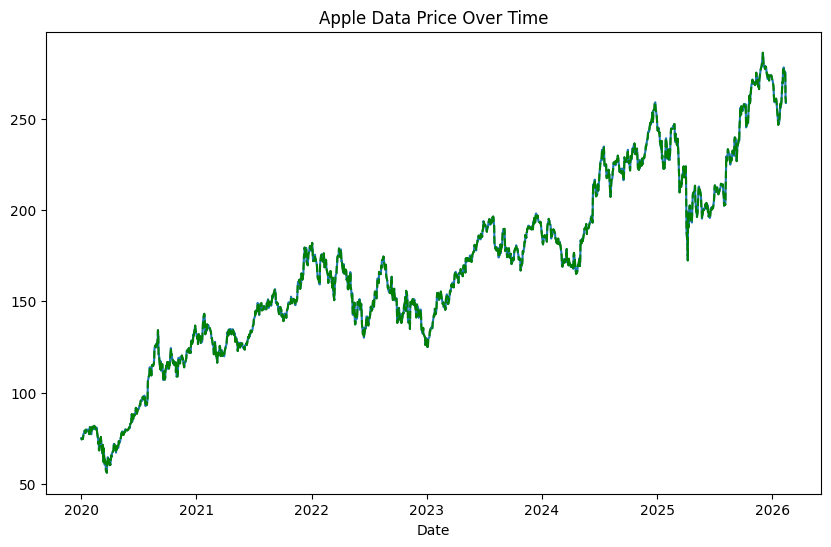

In [689]:
plt.figure (figsize=(10,6))
plt.plot (data['Close'], label='AAPL Closing Price')
plt.title ('Apple Data Price Over Time')
plt.plot(data['Close'],'g--')
plt.xlabel ('Date')

In [690]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [691]:
tickers = ["MC.PA", "^FCHI"]  # LVMH et CAC 40

start_date = "2015-01-01"
end_date = "2025-01-01"

data = yf.download(tickers, start=start_date, end=end_date)
data = data["Close"].dropna()

print("Données téléchargées avec succès")
print(data.head())

/usr/local/python/3.12.1/lib/python3.12/site-packages/yfinance/scrapers/history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()
/usr/local/python/3.12.1/lib/python3.12/site-packages/yfinance/scrapers/history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()
[*********************100%***********************]  2 of 2 completed

Données téléchargées avec succès
Ticker           MC.PA        ^FCHI
Date                               
2015-01-02  107.453506  4252.290039
2015-01-05  104.332970  4111.359863
2015-01-06  103.142204  4083.500000
2015-01-07  103.224342  4112.729980
2015-01-08  106.468071  4260.189941


In [692]:
# On va calculer les rendements journaliers
returns = data.pct_change().dropna()

print("Rendements calculés")
returns.head()

Rendements calculés


Ticker,MC.PA,^FCHI
Date,,
2015-01-05,-0.029041,-0.033142
2015-01-06,-0.011413,-0.006776
2015-01-07,0.000796,0.007158
2015-01-08,0.031424,0.035855
2015-01-09,-0.015041,-0.019041


<Figure size 1000x600 with 0 Axes>

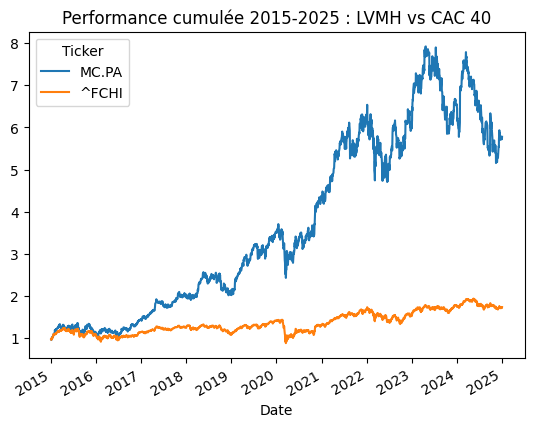

In [693]:
# Performance cumulée
cumulative = (1 + returns).cumprod()

plt.figure(figsize=(10,6))
cumulative.plot()
plt.title("Performance cumulée 2015-2025 : LVMH vs CAC 40")
plt.show()

In [694]:
# Volatilité annualisée
volatility = returns.std() * np.sqrt(252)

print("Volatilité annualisée :")
volatility

Volatilité annualisée :


Ticker
MC.PA    0.276792
^FCHI    0.187202
dtype: float64

In [695]:
# Création tableau comparatif volatilité

volatility_table = pd.DataFrame({
    "Volatilité annualisée (%)": volatility * 100
})

volatility_table = volatility_table.round(2)

print("Tableau comparatif de la volatilité :")
volatility_table

Tableau comparatif de la volatilité :


,Volatilité annualisée (%)
Ticker,
MC.PA,27.68
^FCHI,18.72


In [696]:
volatility_table.index = ["LVMH", "CAC 40"]
volatility_table

,Volatilité annualisée (%)
LVMH,27.68
CAC 40,18.72


In [697]:
# Rendement annualisé
annual_return = returns.mean() * 252

print("Rendement annualisé :")
print(annual_return)

Rendement annualisé :
Ticker
MC.PA    0.210919
^FCHI    0.071923
dtype: float64


In [698]:
# Création tableau comparatif rendement

return_table = pd.DataFrame({
    "Rendement annualisé (%)": annual_return * 100
})

return_table = return_table.round(2)

# Renommer les index pour plus de clarté
return_table.index = ["LVMH", "CAC 40"]

print("Tableau comparatif du rendement annualisé :")
return_table

Tableau comparatif du rendement annualisé :


,Rendement annualisé (%)
LVMH,21.09
CAC 40,7.19


In [699]:
# Ratio de Sharpe
risk_free_rate = 0.02  # 2% hypothèse

sharpe = (annual_return - risk_free_rate) / volatility

print("Ratio de Sharpe :")
sharpe

Ratio de Sharpe :


Ticker
MC.PA    0.689758
^FCHI    0.277362
dtype: float64

In [700]:
# Max Drawdown
def max_drawdown(r):
    cumulative = (1 + r).cumprod()
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak
    return drawdown.min()

max_dd = returns.apply(max_drawdown)

print("Max Drawdown :")
max_dd

Max Drawdown :


Ticker
MC.PA   -0.349251
^FCHI   -0.385585
dtype: float64

In [701]:
# Création tableau global comparatif

summary_table = pd.DataFrame({
    "Rendement annualisé (%)": (annual_return * 100),
    "Volatilité annualisée (%)": (volatility * 100),
    "Ratio de Sharpe": sharpe,
    "Max Drawdown (%)": (max_dd * 100)
})

summary_table = summary_table.round(2)

# Renommer pour plus de clarté
summary_table.index = ["LVMH", "CAC 40"]

print("Tableau comparatif global (2015-2025) :")
summary_table

Tableau comparatif global (2015-2025) :


,Rendement annualisé (%),Volatilité annualisée (%),Ratio de Sharpe,Max Drawdown (%)
LVMH,21.09,27.68,0.69,-34.93
CAC 40,7.19,18.72,0.28,-38.56
